In [4]:
!nvidia-smi

Mon Nov 28 08:42:31 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  A100-SXM4-40GB      Off  | 00000000:00:04.0 Off |                    0 |
| N/A   27C    P0    46W / 400W |      0MiB / 40536MiB |      0%      Default |
|                               |                      |             Disabled |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [5]:
!pip install datasets transformers evaluate 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 451 kB 4.4 MB/s 
     |████████████████████████████████| 5.5 MB 74.8 MB/s 
     |████████████████████████████████| 72 kB 1.9 MB/s 
     |████████████████████████████████| 182 kB 90.6 MB/s 
     |████████████████████████████████| 115 kB 93.5 MB/s 
     |████████████████████████████████| 212 kB 87.8 MB/s 
     |████████████████████████████████| 127 kB 80.3 MB/s 
     |████████████████████████████████| 7.6 MB 76.2 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3


In [6]:
!pip install wandb huggingface_hub

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.9 MB 4.9 MB/s 
     |████████████████████████████████| 182 kB 87.4 MB/s 
     |████████████████████████████████| 168 kB 65.8 MB/s 
     |████████████████████████████████| 62 kB 1.8 MB/s 
     |████████████████████████████████| 168 kB 59.2 MB/s 
     |████████████████████████████████| 166 kB 69.6 MB/s 
     |████████████████████████████████| 166 kB 73.6 MB/s 
     |████████████████████████████████| 162 kB 73.0 MB/s 
     |████████████████████████████████| 162 kB 73.9 MB/s 
     |████████████████████████████████| 158 kB 74.4 MB/s 
     |████████████████████████████████| 157 kB 72.6 MB/s 
     |████████████████████████████████| 157 kB 91.5 MB/s 
     |████████████████████████████████| 157 kB 92.7 MB/s 
     |████████████████████████████████| 157 kB 89.0 MB/s 
     |████████████████████████████████| 157 kB 85.6 MB/s 
     |████████████████████████████

In [7]:
!huggingface-cli login


    _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
    _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
    _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
    _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
    _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|

    To login, `huggingface_hub` now requires a token generated from https://huggingface.co/settings/tokens .
    
Token: 
Add token as git credential? (Y/n) n
Token is valid.
Your token has been saved to /root/.huggingface/token
Login successful


In [8]:
import wandb
!wandb login

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit: 
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


In [17]:
%env WANDB_NOTEBOOK_NAME=Code_Transformer
# !export WANDB_NOTEBOOK_NAME=Code_Transformer

env: WANDB_NOTEBOOK_NAME=Code_Transformer


In [18]:
!env | grep WANDB

WANDB_NOTEBOOK_NAME=Code_Transformer
WANDB_SERVICE=2-105-tcp-localhost-45665
WANDB_REQUIRE_SERVICE=True


In [ ]:
from datasets import load_dataset

# dataset streaming (will only download the data as needed)
ds = load_dataset("bigcode/the-stack", data_dir="data/dockerfile", streaming=True, split="train")
# for sample in iter(ds): print(sample["content"])

In [ ]:
from transformers import AutoModelForCausalLM, AutoTokenizer

checkpoint = "Salesforce/codegen-350M-multi" # 2B
base_model = AutoModelForCausalLM.from_pretrained(checkpoint)
tokenizer = AutoTokenizer.from_pretrained(checkpoint)


device = 'cuda' if torch.cuda.is_available() else 'cpu' 

# model = AutoModelForMaskedLM.from_pretrained("distilbert-base-uncased")
base_model.train().to(device)

# maybe try sequence length of 1024


In [ ]:
%%time

# text = """function setup() {
#   createCanvas(400, 400);
# }

# function draw() {"""


text = """
<!DOCTYPE html>
<html lang="en">
    <head>
        <meta charset="UTF-8" />
        <meta name="viewport" content="width=device-width, initial-scale=1.0" />

        <link rel="stylesheet" href="styles.css" />
        <title>Frogs</title>
    </head>
    <body>"""

#         <header>
#             <h1>>Header</h1>
#         </header>

#         <script src="Index.js"></script>
#     </body>
# </html>
# """

# text = """
# Create a circle on a canvas
# """

batch = tokenizer(text, return_tensors="pt")

batch = {k: v.to(device) for k, v in batch.items()}

completion = base_model.generate(**batch, max_new_tokens = 512)

print(tokenizer.decode(completion[0]))

# Fine tune the model

In [57]:
import torch

torch.cuda.is_available()

True

In [58]:
from transformers import AutoModelForCausalLM, AutoTokenizer

checkpoint = "Salesforce/codegen-350M-multi" # 2B
model = AutoModelForCausalLM.from_pretrained(checkpoint)

device = 'cuda' if torch.cuda.is_available() else 'cpu' 

model.train().to(device)


tokenizer = AutoTokenizer.from_pretrained(checkpoint)
tokenizer.add_special_tokens({'pad_token': '<|pad|>', 
                              'eos_token':'<|endoftext|>',  
                              'bos_token':'<|startoftext|>'})


2

# Pytorch Native way

In [59]:
from torch.utils.data.distributed import Dataset
from datasets import load_dataset
from torch.nn.utils.rnn import pad_sequence

seed, buffer_size = 42, 240

ds = load_dataset("bigcode/the-stack", data_dir="data/css", streaming=True, split="train")

dataset = ds.map(lambda examples: tokenizer(examples['content'], return_tensors="pt", padding='max_length', truncation=True, max_length=512)) #truncation = True, padding = True))


dataset = dataset.map(
    lambda x: {"input_ids": x['input_ids'].reshape(-1)}
)

dataset = dataset.map(
    lambda x: {"attention_mask": x['attention_mask'].reshape(-1)}
)

to_exclude = ['content', 'avg_line_length', 'max_line_length', 'alphanum_fraction', 'licenses', 'repository_name', 'path', 'size', 'lang'] # 'label_ids', 'input_ids', 'attention_mask',

dataset = dataset.remove_columns(to_exclude)

# dataset = dataset.map(
#     lambda x: {"input_ids": pad_sequence(x['input_ids'].tolist(), batch_first = True)}
# )

dataset = dataset.shuffle(seed, buffer_size=buffer_size)

dataset = dataset.with_format("torch")

In [60]:
import torch
from torch.utils.data import DataLoader
from transformers import AutoModelForMaskedLM #DataCollatorForLanguageModeling


train_dataloader = DataLoader(dataset, batch_size=config.batch_size)

In [61]:
# for i, _ in zip(dataset, [1, 2, 3]):
#   print(i.keys())

In [49]:
# ['content', 'avg_line_length', 'max_line_length', 'alphanum_fraction', 'licenses', 'repository_name', 'path', 'size', 'lang', 'input_ids', 'attention_mask', 'label_ids']

In [50]:
# for i, _ in zip(train_dataloader, [1, 2, 3]):
#   print(i)

In [62]:
# WandB – Initialize a new run
wandb.init(project="codegen_css")
wandb.watch_called = False # Re-run the model without restarting the runtime, unnecessary after our next release

# WandB – Config is a variable that holds and saves hyperparameters and inputs
config = wandb.config          # Initialize config

config.batch_size = 10          # input batch size for training (default: 64)
config.test_batch_size = 10    # input batch size for testing (default: 1000)
config.steps_per_epoch = 5

config.steps = 100
config.epochs = int(config.steps / config.steps_per_epoch)             # number of epochs to train (default: 10)
config.lr = 1e-7               # learning rate (default: 0.01)

# config.no_cuda = False         # disables CUDA training
# config.seed = 42               # random seed (default: 42)
# config.log_interval = 10     # how many batches to wait before logging training status


Epoch,▁▁▁▁▂▂▂▂▂▂▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▇▇▇▇▇▇████
Step,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
Train Loss,█▇▆▆▅▆█▆▅▆▆▃▃▃▇▅▄▆▄▃▇▁▂▃▆▂▅▄▂▂▂▃▂▅▂▄▃▅▄▃
Epoch,19
Step,1
Train Loss,12.27983


In [63]:
from transformers import get_scheduler, get_cosine_schedule_with_warmup

optimizer = torch.optim.AdamW(params=model.parameters(), lr=config.lr)



# num_training_steps = config.epochs / steps_per_epoch

# lr_scheduler = get_scheduler(
#     name="linear", optimizer=optimizer, num_warmup_steps=0, num_training_steps = config.steps
# )

cosine_lr_scheduler = get_cosine_schedule_with_warmup(
    optimizer = optimizer, num_warmup_steps = 150, num_training_steps = config.steps
)

In [64]:
for batch in train_dataloader:
  print(batch['input_ids'].shape)
  break

torch.Size([10, 1, 512])


In [65]:
# WandB – wandb.watch() automatically fetches all layer dimensions, gradients, model parameters and logs them automatically to your dashboard.
# Using log="all" log histograms of parameter values in addition to gradients
wandb.watch(model, log="all")

[]

In [66]:

from tqdm import tqdm

epoch_history = []
loss_history = []

step_id = 0
for epoch in range(config.epochs):
    dataset.set_epoch(epoch)

    epoch_history.append(epoch)

    for i, batch in enumerate(tqdm(train_dataloader, total=config.steps_per_epoch)):
        if i == config.steps_per_epoch:
            break
        step_id =+ 1
        batch = {k: v.to(device) for k, v in batch.items()}
        outputs = model(**batch)
        loss = outputs[0]
        loss.mean().backward()

        loss_history.append(float(loss.mean().cpu().detach().numpy()))

        optimizer.step()
        cosine_lr_scheduler.step()
        optimizer.zero_grad()
        if i % 10 == 0:
            print(f" loss: {loss.mean()}")

        # Log the loss and accuracy values at the end of each epoch
        wandb.log({
        "Epoch": epoch,
        'Step': step_id,
        "Train Loss": loss.mean(),
        # "Train Acc": acc_train,
        # "Valid Loss": loss_valid,
        # "Valid Acc": acc_valid
        })


 20%|██        | 1/5 [00:02<00:10,  2.63s/it]

 loss: 18.076702117919922


 20%|██        | 1/5 [00:02<00:09,  2.30s/it]

 loss: 16.793601989746094


 20%|██        | 1/5 [00:02<00:10,  2.51s/it]

 loss: 14.570626258850098


 20%|██        | 1/5 [00:02<00:08,  2.08s/it]

 loss: 18.63474464416504


 20%|██        | 1/5 [00:02<00:08,  2.12s/it]

 loss: 14.548398971557617


 20%|██        | 1/5 [00:02<00:11,  2.96s/it]

 loss: 16.583656311035156


 20%|██        | 1/5 [00:02<00:11,  2.86s/it]

 loss: 13.159344673156738


 20%|██        | 1/5 [00:03<00:15,  3.84s/it]

 loss: 17.687538146972656


 20%|██        | 1/5 [00:01<00:07,  1.93s/it]

 loss: 14.491167068481445


 20%|██        | 1/5 [00:02<00:11,  2.92s/it]

 loss: 14.070979118347168


 20%|██        | 1/5 [00:03<00:14,  3.73s/it]

 loss: 17.097578048706055


 20%|██        | 1/5 [00:02<00:08,  2.21s/it]

 loss: 11.910438537597656


 20%|██        | 1/5 [00:03<00:13,  3.25s/it]

 loss: 16.715364456176758


 20%|██        | 1/5 [00:03<00:12,  3.19s/it]

 loss: 14.84394359588623


 20%|██        | 1/5 [00:02<00:09,  2.46s/it]

 loss: 12.295144081115723


 20%|██        | 1/5 [00:02<00:10,  2.73s/it]

 loss: 16.115503311157227


 20%|██        | 1/5 [00:01<00:06,  1.63s/it]

 loss: 9.13477897644043


 20%|██        | 1/5 [00:01<00:07,  1.95s/it]

 loss: 10.357149124145508


 20%|██        | 1/5 [00:02<00:10,  2.53s/it]

 loss: 12.757976531982422


 20%|██        | 1/5 [00:02<00:08,  2.03s/it]

 loss: 11.856660842895508


100%|██████████| 5/5 [00:06<00:00,  1.29s/it]


In [131]:
loss_history = [float(loss.cpu().detach().numpy()) for loss in loss_history]

AttributeError: ignored

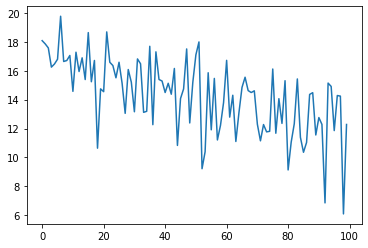

In [67]:
import matplotlib.pyplot as plt
plt.plot(loss_history);

In [133]:
%%time

text = """
#container {
  padding: 10px;
}

h1 {
"""

# text = ""

# text = """
# Create a circle on a canvas
# """


batch = tokenizer(text, return_tensors="pt")

batch = {k: v.to(device) for k, v in batch.items()}

completion = model.generate(**batch, max_new_tokens = 512)

print(tokenizer.decode(completion[0]))

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.



#container {
  padding: 10px;
}

h1 {
  font-size: 100%;
  line-height: 130%;
  font-weight: 400;
  font-style: italic;
  text-transform: uppercase;
}

.ace_editor {
  display: inline-block;
  margin: 0px;
  padding: 0px;
  border: 1px solid #ccc;
  border-radius: 2px;
  position: absolute;
  top: 0px;
  left: 0px;
  padding: 4px 8px;
  background: #fff;
}

.ace_editor.ace_cursor.ace_overwrite_tag {
  text-decoration: underline;
}

.ace_editor.ace_marker-layer.ace_selection {
  background: #00ff00;
  color: #666;
}

.ace_editor.ace_marker-layer.ace_step {
  background: #00ff00;
  padding: 0 4px;
}

.ace_editor.ace_marker-layer.ace_bracket {
  margin: -1px 0 0 -1px;
  border: 1px solid #ccc;
  padding: 1px 8px;
}

.ace_editor.ace_marker-layer.ace_active_line {
  background: #00ff00;
  opacity: 0.5;
}

.ace_editor.ace_gutter_active_line {
  background-color: #eee;
  opacity: 0.5;
  cursor: pointer;
  text-shadow: 1px 1px 1px #000;
  border-radius: 2px;
}

.ace_editor.ace_marker-layer.ac

# Save

In [135]:
import os
# os.makedirs("css_model")

model.save_pretrained("css_model")

model.push_to_hub("codegen_css")

# WandB – Save the model checkpoint. This automatically saves a file to the cloud and associates it with the current run.
torch.save(model.state_dict(), "model.h5")
wandb.save('model.h5')


CommitInfo(commit_url='https://huggingface.co/alecsharpie/codegen_css/commit/a71cc47c6635199d01b20f1d7ecde43c7908450b', commit_message='Upload CodeGenForCausalLM', commit_description='', oid='a71cc47c6635199d01b20f1d7ecde43c7908450b', pr_url=None, pr_revision=None, pr_num=None)

# Evaluate

In [ ]:
import numpy as np
import evaluate

metric = evaluate.load("accuracy")

In [ ]:
# https://huggingface.co/docs/transformers/perplexity

In [ ]:
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    return metric.compute(predictions=predictions, references=labels)

In [ ]:
import evaluate

metric = evaluate.load("accuracy")
model.eval()

for batch in eval_dataloader:
    batch = {k: v.to(device) for k, v in batch.items()}
    with torch.no_grad():
        outputs = model(**batch)

    logits = outputs.logits
    predictions = torch.argmax(logits, dim=-1)
    metric.add_batch(predictions=predictions, references=batch["labels"])

metric.compute()

In [33]:
for k, v in batch.items():
  print(v.shape)

torch.Size([2, 512])
torch.Size([2, 512])


# Easy huggingface trainer way

In [ ]:
from torch.utils.data.distributed import Dataset
from datasets import load_dataset
from torch.nn.utils.rnn import pad_sequence

seed, buffer_size = 42, 512

ds = load_dataset("bigcode/the-stack", data_dir="data/css", streaming=True, split="train")

dataset = ds.map(lambda examples: tokenizer(examples['content'], return_tensors="pt", padding='max_length', truncation=True, max_length=512)) #truncation = True, padding = True))

# dataset = dataset.map(lambda examples: examples['input_ids'][0, -1]) #examples.update({'label_ids': }

dataset = dataset.map(
    lambda x: {"label_ids": x['input_ids'][0, -1]}
)

dataset = dataset.map(
    lambda x: {"input_ids": x['input_ids'][:, 0:-1]}
)

# dataset = dataset.map(
#     lambda x: {"input_ids": pad_sequence(x['input_ids'].tolist(), batch_first = True)}
# )

dataset = dataset.shuffle(seed, buffer_size=buffer_size)

dataset = dataset.with_format("torch")

In [ ]:
from transformers import TrainingArguments, Trainer

training_args = TrainingArguments(output_dir="test_trainer", max_steps = 3, per_device_train_batch_size = 2)

PyTorch: setting up devices
The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). In v5, you will need to use `--report_to all` to get the same behavior as now. You should start updating your code and make this info disappear :-).


In [ ]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=dataset,
    # eval_dataset=small_eval_dataset,
    # compute_metrics=compute_metrics,
)

max_steps is given, it will override any value given in num_train_epochs


In [ ]:
trainer.train()

# Guesslang

In [ ]:
!pip install guesslang

In [ ]:
from guesslang import Guess


guess = Guess()

name = guess.language_name("""
var fontWeight = /^(bold|700|800|900|normal|400|600|300|200|100|80|50|40|30|20|10|8|4|2|1)$/i;

function getFontWeight(font) {
  var i, prop, value;
  if (!font) {
    return;
  }
  for (i = 0; i < font.weight.length; i++) {
    prop = font.weight[i];
    value = '' + prop;
    if (fontWeight.test(value)) {
      return prop;
    }
  }
}

""")

print(name)